In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
DATA_DIR = "landscape_data"
NNP_DATA_PATH = os.path.join(DATA_DIR, "nnp_predictions_no_outliers.csv")
POLYMORPHS_DATA_PATH = os.path.join(DATA_DIR, "polymorphs.csv")
DFT_DATA_PATH = os.path.join(DATA_DIR, "uncertain_structures_DFT_singlepoints.csv")
CSP_DATA_PATH = os.path.join(DATA_DIR, "initial_csp_landscape/structures.csv")
CSP_POLYMORPHS_DATA_PATH = os.path.join(DATA_DIR, "initial_csp_landscape/polymorphs.csv")

In [3]:
plot_options = {
    "relative_energy": True,
    #"inside_legend": True,
    "ymax": 250,
    #"ymax": -10.0
}

In [4]:
SMALL_SIZE = 12.5
MEDIUM_SIZE = 18
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [5]:
def plot_csp_landscape(csv_file, fig, ax, **kwargs):

    df = pd.read_csv(csv_file)
    energy_col = "energy"
    density_col = "density"   

    if kwargs.get("relative_energy", False):
        global min_energy
        min_energy = df[energy_col].min()
        print(min_energy)
        df[energy_col] = df[energy_col] - min_energy 


    ax.scatter(
       df[density_col], 
       df[energy_col], 
       linewidths=1.6,
       facecolors= 'grey', 
       edgecolor="k",
       s=32,
       marker='o',
       label='CSP', 
       alpha=0.5,
       zorder=1,
    )

In [6]:
def plot_csp_expt_structures(csv_file, fig, ax, **kwargs):
    
    df = pd.read_csv(csv_file)
    energy_col = kwargs.get("energy_col")
    density_col = "density"
    uncertainty_col = "std_dev_kjmol_per_molecule"
    polymorph_col = "polymorph"
    
    n = len(df[polymorph_col].unique())
        
    # plot relative energy
    if kwargs.get("relative_energy", False):
        global min_energy
        df[energy_col] = df[energy_col] - min_energy 

    colors = sns.color_palette("colorblind", n) 
    ax.set_prop_cycle('color', colors)

    for name, group in df.groupby(polymorph_col):
        ax.plot(
            group[density_col],
            group[energy_col],
            linestyle='',
            marker='X',
            markeredgewidth=2.0,
            markersize=14,
            #label=name,
            markeredgecolor = 'k',
        )

        if kwargs.get("annotate", False):
            ax.annotate(name, (group.density, group.energy))

    

    return n

In [7]:
def plot_nnp_landscape(csv_file, fig, ax, **kwargs):

    df = pd.read_csv(csv_file)
    energy_col = "corrected_lattice_energy_kjmol_per_molecule"
    density_col = "density"
    uncertainty_col = "std_dev_kjmol_per_molecule"

    # plot relative energy
    if kwargs.get("relative_energy", False):
        global min_energy
        min_energy = df[energy_col].min()
        print(min_energy)
        df[energy_col] = df[energy_col] - min_energy 


    ax.errorbar(
        df[density_col], 
        df[energy_col], 
        yerr=df[uncertainty_col],
        markerfacecolor= 'grey', 
        markeredgewidth=1.4,
        markersize=6,
        capsize=3.0,
        elinewidth=0.3,
        ecolor='k',
        fmt='o',
        label='cNNP', 
#         color='grey',
        markeredgecolor="k",
        alpha=0.6,
        zorder=1,
    )
    

In [8]:
def plot_expt_structures(csv_file, fig, ax, **kwargs):
    
    df = pd.read_csv(csv_file)
    energy_col = kwargs.get("energy_col")
    density_col = "density"
    uncertainty_col = "std_dev_kjmol_per_molecule"
    polymorph_col = "polymorph"
    
    n = len(df[polymorph_col].unique())
        
    # plot relative energy
    if kwargs.get("relative_energy", False):
        global min_energy
        df[energy_col] = df[energy_col] - min_energy 

    colors = sns.color_palette("colorblind", n) 
    ax.set_prop_cycle('color', colors)

    for name, group in df.groupby(polymorph_col):
        ax.plot(
            group[density_col],
            group[energy_col],
            linestyle='',
            marker='X',
            markeredgewidth=2.0,
            markersize=14,
            label=name,
            markeredgecolor = 'k',
        )

        if kwargs.get("annotate", False):
            ax.annotate(name, (group.density, group.energy))

    

    return n

In [9]:
def plot_dft_structures(csv_file, fig, ax, **kwargs):

    df = pd.read_csv(csv_file)
    energy_col = "PBE_lattice_energy_kjmol"
    density_col = "density"
    uncertainty_col = "std_dev_kjmol_per_molecule"   

    if kwargs.get("relative_energy", False):
        global min_energy
        df[energy_col] = df[energy_col] - min_energy 
        
    df = df[df[energy_col] < 300]


    ax.scatter(
       df[density_col], 
       df[energy_col], 
       facecolors= 'peru', 
       linewidths=1,
       edgecolor="peru",
       s=24,
       marker='o',
       label='DFT', 
       color='peru',
       alpha=0.8,
       zorder=3,
    )

-261.0295
-252.2517483


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


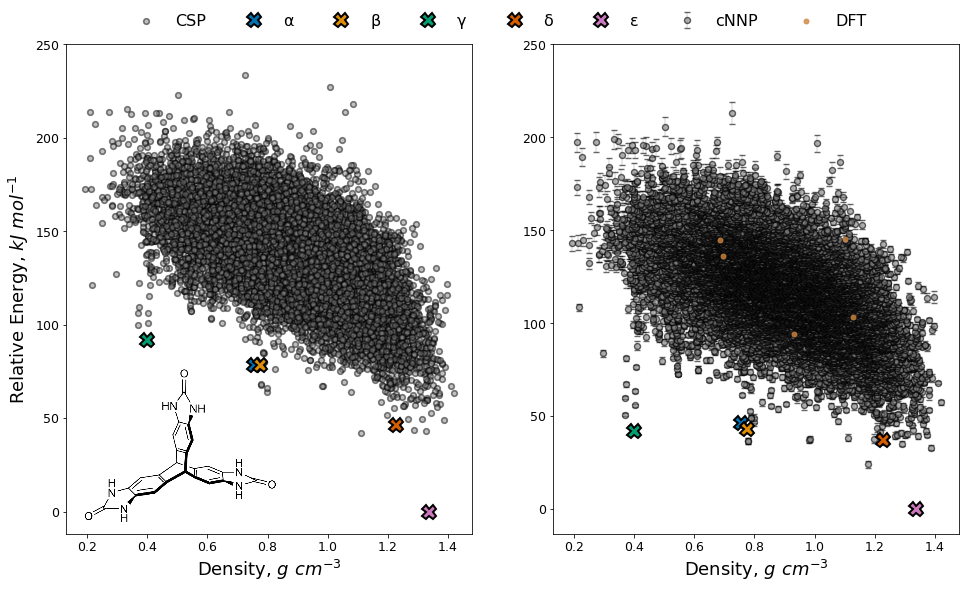

In [10]:
##### combined plot with molecule
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16,9),
)

plot_csp_landscape(CSP_DATA_PATH, fig, ax1, **plot_options)
num_labels = plot_csp_expt_structures(CSP_POLYMORPHS_DATA_PATH, fig, ax1, energy_col="energy", **plot_options)

plot_nnp_landscape(NNP_DATA_PATH, fig, ax2, **plot_options)
plot_dft_structures(DFT_DATA_PATH, fig, ax2, **plot_options)
num_labels = plot_expt_structures(
    POLYMORPHS_DATA_PATH, fig, ax2, energy_col="corrected_lattice_energy_kjmol_per_molecule", **plot_options
)

fig.set_facecolor('white')
    
#ax.set_title("Target XXVII Submitted Landscape")
ax1.set_xlabel(
    'Density, $g\ cm^{-3}$',
    color='k',
)
ax2.set_xlabel(
    'Density, $g\ cm^{-3}$',
    color='k',
)
if plot_options.get("relative_energy", False):
    ax1.set_ylabel('Relative Energy, $kJ\ mol^{-1}$')
else:
    ax1.set_ylabel('Lattice Energy, $kJ\ mol^{-1}$')
ax1.tick_params(
    axis='both',
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True,
    colors='k',
)
ax2.tick_params(
    axis='both',
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True,
    colors='k',
)


if plot_options.get("ymax", None) is not None:
    ax1.set_ylim(top = plot_options.get("ymax"), )
    ax2.set_ylim(top = plot_options.get("ymax"), )
if plot_options.get("xmin", None) is not None:
    ax1.set_xlim(left=plot_options.get("xmin"))
    ax2.set_xlim(left=plot_options.get("xmin"))

# ax.autoscale_view(True,True,True)
# ax.grid(
#     visible=False,
#     #axis='x',
# )
# ax.set_facecolor('white')

# legend ordering
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
order = [0,1,2,3,4,5,7,6]
#order = [0,7,1,2,3,4,5,6]

if not plot_options.get("no_legend", False):
    if plot_options.get("inside_legend", False):
        legend = fig.legend(
            [handles[idx] for idx in order],
            [labels[idx] for idx in order],
            loc='upper right', 
            #bbox_to_anchor=(0.88, 0.88),  
            bbox_to_anchor=(0.91, 0.895),  
            #ncol=num_labels,
            fancybox=True,
            #shadow=True,
            frameon=True,
        )
        frame = legend.get_frame()
        frame.set_facecolor('none')
        frame.set_linewidth(1.5)
        frame.set_edgecolor('k')
    else:
        legend = fig.legend(
            [handles[idx] for idx in order],
            [labels[idx] for idx in order],
            loc='upper center', 
            bbox_to_anchor=(0.5, 0.95),  
            ncol=num_labels + 3,
            fancybox=True,
            #shadow=True,
            frameon=False,
        )

        
im = plt.imread("ttbi.png")
#plt.imshow(im)
imagebox = OffsetImage(im, zoom = 0.3)
#imagebox.image.axes = ax1
ab = AnnotationBbox(
    imagebox, (0.28, 0.18),
    #xybox=(0.5, 0.50), 
    xycoords="axes fraction",
    #boxcoords="axes fraction",
    frameon = False
)
ax1.add_artist(ab)
        

In [11]:
#fig.savefig("t2_combined_landscape_with_molecule_600dpi.png", dpi=600, bbox_inches="tight", )#transparent=True)